In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from itertools import product

In [31]:
train = pd.read_csv('data/scenario_1/train.csv')
test = pd.read_csv('data/scenario_1/test.csv')

In [32]:
train

,Unnamed: 0,Date,price
0,0,2014-09-17,457.334015
1,1,2014-09-18,424.440002
2,2,2014-09-19,394.795990
3,3,2014-09-20,408.903992
4,4,2014-09-21,398.821014
...,...,...,...
2932,2932,2022-09-27,19110.546875
2933,2933,2022-09-28,19426.720703
2934,2934,2022-09-29,19573.050781
2935,2935,2022-09-30,19431.789062


In [33]:
test = test.set_index(keys='Date')

In [34]:
training_data = list(train['price'])
testing_data = list(test['price'])

In [35]:
model_predictions = []
n_test_obser = len(testing_data)

In [36]:
# Initial approximation of parameters
Ps = [7,8,9]
Qs = [7,9]
d=[1]
parameters = product(Ps,d,Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model = ARIMA(training_data, order=(param[0], param[1], param[2])).fit()
    except ValueError:
        #print('wrong parameters:', param)
        continue
    results.append([model,param])

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

In [38]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

def mape_model(test,model):
         pred = model.forecast(steps=len(test))
         return mean_absolute_percentage_error(test,pred)

In [39]:
model_jud = pd.DataFrame(columns=['MAPE','params'])

for model_info in results:
    mape = mape_model(testing_data,model_info[0])
    params = str(model_info[1])
    model_jud.loc[len(model_jud.index)] = [mape,params]

model_jud

,MAPE,params
0,2.484014,"(7, 1, 7)"
1,2.166798,"(7, 1, 9)"
2,2.762035,"(8, 1, 7)"
3,2.409949,"(8, 1, 9)"
4,2.235927,"(9, 1, 7)"
5,2.424587,"(9, 1, 9)"


ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

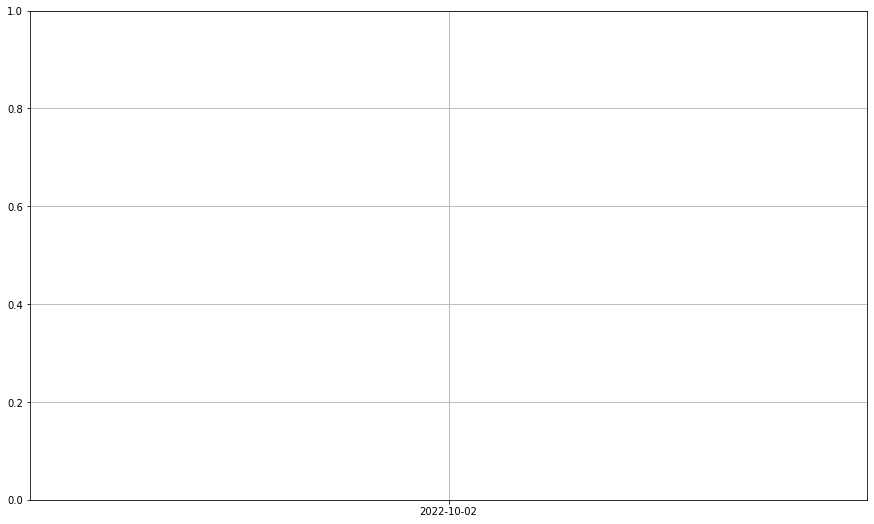

In [40]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = test.index

plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='BTC predicted price')
plt.plot(date_range, testing_data, color ='red', label='BTC Actual Price')

plt.title('Bitcoin Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()